In [1]:
import sys
import importlib
import os
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
data_dir = "../datasets/artificial_data/3d_shapes"

def create_list():
    pairs = []
    all_files = os.listdir(data_dir)
    for filename in all_files:
        label = int(filename.split("_").pop().replace(".pt", ""))
        label_dict = { "size": label }
        file_path = os.path.join(data_dir, filename)
        pairs.append({"image": file_path, "label": label_dict})
    return pairs

pairs = create_list()
print(pairs)

[{'image': '../datasets/artificial_data/3d_shapes/volume_2871_label_28.pt', 'label': {'size': 28}}, {'image': '../datasets/artificial_data/3d_shapes/volume_4776_label_16.pt', 'label': {'size': 16}}, {'image': '../datasets/artificial_data/3d_shapes/volume_3638_label_14.pt', 'label': {'size': 14}}, {'image': '../datasets/artificial_data/3d_shapes/volume_2970_label_12.pt', 'label': {'size': 12}}, {'image': '../datasets/artificial_data/3d_shapes/volume_2837_label_10.pt', 'label': {'size': 10}}, {'image': '../datasets/artificial_data/3d_shapes/volume_946_label_28.pt', 'label': {'size': 28}}, {'image': '../datasets/artificial_data/3d_shapes/volume_1724_label_28.pt', 'label': {'size': 28}}, {'image': '../datasets/artificial_data/3d_shapes/volume_1219_label_25.pt', 'label': {'size': 25}}, {'image': '../datasets/artificial_data/3d_shapes/volume_4104_label_12.pt', 'label': {'size': 12}}, {'image': '../datasets/artificial_data/3d_shapes/volume_729_label_28.pt', 'label': {'size': 28}}, {'image': '

In [3]:
from src.transformers.TensorLoaderTransfomer import TensorLoader
from monai.transforms import Compose, LoadImaged, EnsureChannelFirstD, ScaleIntensityd, ToTensord, ResizeD, Lambdad, NormalizeIntensityD

from src.transformers.SliceTransformer import SliceAggregateTransform
importlib.reload(sys.modules['src.transformers.SliceTransformer'])

importlib.reload(sys.modules['src.transformers.TensorLoaderTransfomer'])
transforms = [
    TensorLoader(keys=["image"]),
    SliceAggregateTransform(keys=["image"], slices=9),
    ScaleIntensityd(keys=["image"], minv=0.0, maxv=1.0, factor=1.0),
    NormalizeIntensityD(keys=["image"], nonzero=True, channel_wise=True),
    ToTensord(keys=["image"])
    ]

In [4]:
from src.dataLoaders.NiftiDataLoader2 import NiftiDataLoader
importlib.reload(sys.modules['src.dataLoaders.NiftiDataLoader2'])

<module 'src.dataLoaders.NiftiDataLoader2' from '/Users/mraabo/computer_science/year_3/bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/NiftiDataLoader2.py'>

In [5]:
dataset = 'niftiShort'
data_path = '../datasets/nifti/'
data_dir = f'{data_path}{dataset}'

# data_dir = 'C:/Users/askel/Downloads/NIFTY/NIFTY/'
# max = 8876
dim = 384
data_loader = NiftiDataLoader(data_dir=data_dir, 
                              batch_size=32,
                              spatial_resize=(dim, dim, dim),
                              cache_rate=0.5, 
                              replace_rate=1,
                              transforms=transforms,
                              data_list=pairs,
                              )
# data_loader.load_data(visit_no=visit, subset_size=2058, cache="standard")
# data_loader.load_data(subset_size=84, cache="standard")
#data_loader.load_data(subset_size=4400, cache="standard")
# data_loader.load_data(subset_size=8875, cache="standard")

data_loader.load_data(cache="standard")

File /Users/mraabo/computer_science/year_3/bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/saved_data_lists/data_list.pkl does not exist.
Data list loaded: False
Using custom sampler: False
Subset size: 5000


Loading dataset: 100%|██████████| 500/500 [00:02<00:00, 176.54it/s]

batch_size: 32


In [6]:
from src.models.medical_models.medical_resnet import MedicalResNetModel
importlib.reload(sys.modules['src.models.medical_models.base_medical'])
importlib.reload(sys.modules['src.models.medical_models.medical_resnet'])


from src.models.medical_models.monai_resnet import MonaiMedicalResNet
importlib.reload(sys.modules['src.models.medical_models.monai_resnet'])

from src.models.medical_models.combined_medical import MedicalCombinedResNetModel
importlib.reload(sys.modules['src.models.medical_models.combined_medical'])

<module 'src.models.medical_models.combined_medical' from '/Users/mraabo/computer_science/year_3/bachelor/XAI-in-Medical-Image-Analysis/src/models/medical_models/combined_medical.py'>

In [7]:
fusion_model = MedicalCombinedResNetModel(
    num_epochs=100,
    learning_rate=0.001,
    weight_decay=1e-4,
    data_loader=data_loader,
    dropout_rate=0.1,
    depth=18
    #pretrained=False
)

fusion_model.train()
fusion_model.evaluate()

/opt/miniconda3/envs/MLA/lib/python3.11/site-packages/torch/utils/data/_utils/worker.py:222: UserWarning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1713301817286/work/aten/src/ATen/ParallelNative.cpp:228.)
  torch.set_num_threads(1)


Data loader train loader:  125 3999
Image spatial dimensions:  torch.Size([32, 9, 256, 256])
Number of input channels:  9
gpu:  mps:0
Is cuda available:  False mps
Number of training images: 3999
Epoch 1/100, Train Loss: 17.738826201438904, Val Loss: 3.9357336163520813, R^2 Score: 0.8824087977409363


KeyboardInterrupt: 

In [13]:
# Create a model instance
model = MedicalResNetModel(
    num_epochs=10,
    learning_rate=0.001,
    weight_decay=1e-4,
    data_loader=data_loader,
    dropout_rate=0.0,
    depth=18
    #pretrained=False
)

# model.load_model('MedicalResNetModel_18_6212_epoch_38.pth')
model.train()
model.evaluate()

Data loader train loader:  125 3999
Image spatial dimensions:  torch.Size([32, 9, 256, 256])
Number of input channels:  9
gpu:  mps:0
Is cuda available:  False mps
Number of training images: 3999
Epoch 1/10, Train Loss: 42.742962085723875, Val Loss: 3.2245964854955673, R^2 Score: 0.9033299684524536
Model saved at /Users/mraabo/computer_science/year_3/bachelor/XAI-in-Medical-Image-Analysis/src/models/medical_models/saved_models/MedicalResNetModel_18_3999_height_torch.Size([32, 9, 256, 256])_epoch_1_val_3.22_r2_0.9.pth
Model saved at /Users/mraabo/computer_science/year_3/bachelor/XAI-in-Medical-Image-Analysis/src/models/medical_models/saved_models/MedicalResNetModel_18_3999_height_torch.Size([32, 9, 256, 256])_epoch_1_val_3.22_r2_0.9.pth
Epoch 2/10, Train Loss: 4.141625546932221, Val Loss: 7.04875348508358, R^2 Score: 0.7901703119277954
Epoch 3/10, Train Loss: 2.7520689334869384, Val Loss: 3.1852420419454575, R^2 Score: 0.904496431350708
Model saved at /Users/mraabo/computer_science/year

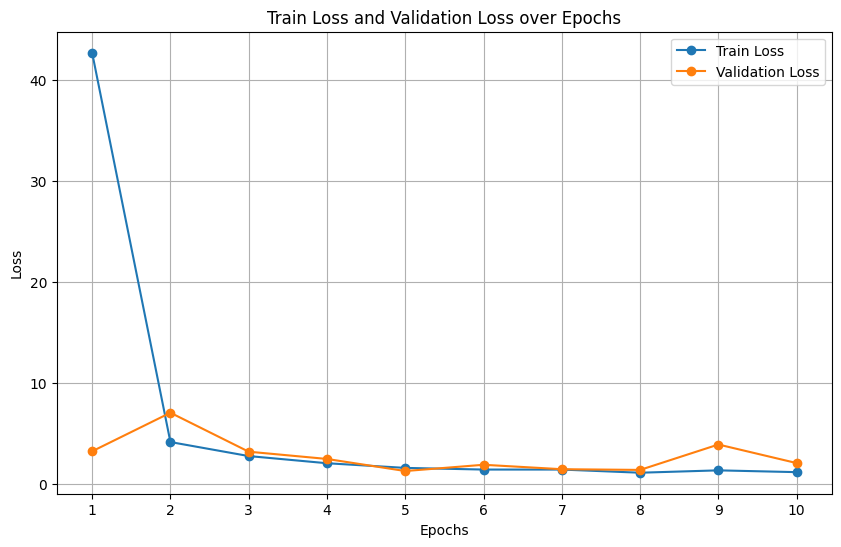

In [14]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(1, 11))
train_loss = [42.742962085723875, 4.141625546932221, 2.7520689334869384, 2.0407947452068327, 
              1.5788128867149354, 1.4134249949455262, 1.4131299614906312, 1.100153112411499, 
              1.3348765921592713, 1.1574740645885468]
val_loss = [3.2245964854955673, 7.04875348508358, 3.1852420419454575, 2.4649068638682365, 
            1.2675845175981522, 1.8881649747490883, 1.448503240942955, 1.3786930590867996, 
            3.8969911262392998, 2.055871047079563]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')

# Labels and Title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.xticks(epochs)  # Set x-axis to show all epoch numbers

# Show plot
plt.show()